<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/21_3_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정확도 이외에도 목적에 맞게 다양한 평가 방법을 사용할 수 있습니다

https://sumniya.tistory.com/26

In [ ]:
import pandas as pd
import seaborn as sns

red = pd.read_csv('/content/drive/MyDrive/ML_DL_202002/wineQualityReds.csv', index_col=0)

X = red.iloc[:,:-1]
y=red.quality.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

from sklearn.svm import SVC

svm=SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svm.fit(X_train2, y_train)

from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test2)
accuracy_score(y_test, y_pred)

0.6520833333333333

In [ ]:
from sklearn.metrics import confusion_matrix
confusion =  confusion_matrix(y_test, y_pred)

In [ ]:
confusion

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  11,   5,   0,   0],
       [  0,   0, 164,  39,   1,   0],
       [  0,   0,  54, 129,   9,   0],
       [  0,   0,   5,  35,  20,   0],
       [  0,   0,   0,   3,   2,   0]])

Text(0.5, 15.0, 'pred_y')

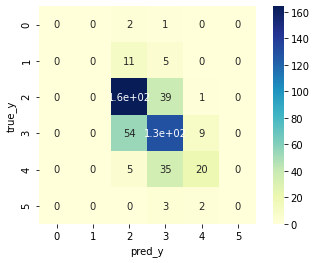

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(confusion, cmap="YlGnBu",annot=True,  square=True)
plt.ylabel('true_y')
plt.xlabel('pred_y')



https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3015216503267974

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 2, 5],
    'gamma': [0.01, 0.1, 0.5, 1]
}

b_accuracy = make_scorer(balanced_accuracy_score)

svc = SVC()
clf = GridSearchCV(svc, param_grid=parameters, n_jobs=-1, verbose=1, scoring = b_accuracy)
clf.fit(X_train2, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5],
                         'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(balanced_accuracy_score), verbose=1)

In [ ]:
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm = SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
svm.fit(X_train2, y_train)
y_pred = svm.predict(X_test2)
accuracy_score(y_test, y_pred)

0.5666666666666667

In [ ]:
balanced_accuracy_score(y_test, y_pred)

0.3374285130718954

In [ ]:
confusion =  confusion_matrix(y_test, y_pred)

In [ ]:
confusion

array([[  1,   1,   0,   1,   0,   0],
       [  1,   1,  10,   3,   1,   0],
       [  1,  15, 134,  50,   4,   0],
       [  0,   7,  49, 113,  21,   2],
       [  0,   4,   6,  25,  23,   2],
       [  0,   0,   1,   2,   2,   0]])

Text(0.5, 15.0, 'pred_y')

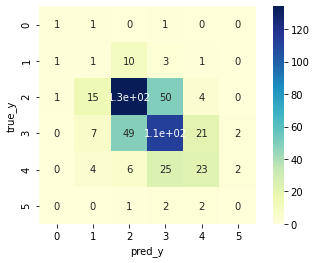

In [ ]:
sns.heatmap(confusion, cmap="YlGnBu",annot=True,  square=True)
plt.ylabel('true_y')
plt.xlabel('pred_y')